In [1]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset
import os
from PIL import Image
from tqdm import tqdm

In [2]:
class SimpleDataset(Dataset):
    def __init__(self, addr,img_addr):
        self.file_name = sorted(os.listdir(addr))
        self.img_addr = img_addr
        self.addr = addr
    def __len__(self):
        return len(self.file_name)

    def __getitem__(self, idx):
        features = np.array(pd.read_csv(os.path.join(self.addr, self.file_name[idx],self.file_name[idx]+'.csv')).iloc[:,5:])
        img = os.path.join(self.img_addr, self.file_name[idx]+'.jpg')
        img = Image.open(img).convert('RGB')
        targ = self.file_name[idx].split('_')[-1]
        return features,img,targ


In [3]:
addr =    r"F:\Frames\extracted\Train"
img_addr = r"F:\Frames\new_dataset\Train_Frames\Train_Frames"
train = SimpleDataset(addr,img_addr)

In [7]:
addr =    r"F:\Frames\extracted\Test"
img_addr = r"F:\Frames\new_dataset\Test_Frames\Test_Frames"
test = SimpleDataset(addr,img_addr)

In [8]:

addr =    r"F:\Frames\extracted\Val"
img_addr = r"F:\Frames\new_dataset\Validation_Frames\Validation_Frames"
val = SimpleDataset(addr,img_addr)

In [9]:
test[0]

(array([[-5.44170e-02,  4.18050e-02, -9.97643e-01, -1.53288e-01,
          5.42740e-02, -9.86690e-01, -1.04000e-01,  4.80000e-02,
          4.04900e+02,  4.09000e+02,  4.14800e+02,  4.18700e+02,
          4.18600e+02,  4.14600e+02,  4.08700e+02,  4.04700e+02,
          3.97000e+02,  4.02000e+02,  4.07700e+02,  4.13600e+02,
          4.18100e+02,  4.20700e+02,  4.21700e+02,  4.18200e+02,
          4.13900e+02,  4.09000e+02,  4.04200e+02,  3.99900e+02,
          4.08300e+02,  4.10100e+02,  4.12700e+02,  4.14600e+02,
          4.14700e+02,  4.12900e+02,  4.10300e+02,  4.08400e+02,
          4.69600e+02,  4.72700e+02,  4.77900e+02,  4.82100e+02,
          4.82800e+02,  4.79700e+02,  4.74500e+02,  4.69800e+02,
          4.63600e+02,  4.67400e+02,  4.72000e+02,  4.77200e+02,
          4.81800e+02,  4.85100e+02,  4.87300e+02,  4.84100e+02,
          4.80200e+02,  4.75700e+02,  4.70900e+02,  4.66500e+02,
          4.73200e+02,  4.75200e+02,  4.77600e+02,  4.79100e+02,
          4.78700e+02,  4

In [11]:
train_x = []
train_y = []
for i,j,k in train:
    train_x.append(i[0])
    train_y.append(int(k))

In [12]:
df_train = pd.DataFrame(train_x)

In [13]:
df_train["target"] = pd.DataFrame(train_y)

In [14]:
from pycaret.classification import *
clf1 = setup(data = df_train, target = 'target',fix_imbalance = True, normalize = True,n_jobs=2)

,Description,Value
0,Session id,3090
1,Target,target
2,Target type,Multiclass
3,Original data shape,"(79066, 710)"
4,Transformed data shape,"(135564, 710)"
5,Transformed train set shape,"(111844, 710)"
6,Transformed test set shape,"(23720, 710)"
7,Numeric features,709
8,Preprocess,True
9,Imputation type,simple


In [15]:

best = clf1.compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:20:12
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Gradient Boosting Classifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9750,0.9975,0.9750,0.9750,0.9750,0.9536,0.9536,81.7050
knn,K Neighbors Classifier,0.9134,0.9761,0.9134,0.9159,0.9139,0.8413,0.8417,17.3210
dt,Decision Tree Classifier,0.9113,0.9199,0.9113,0.9121,0.9116,0.8363,0.8363,76.6850
qda,Quadratic Discriminant Analysis,0.7229,0.0000,0.7229,0.7428,0.7154,0.4689,0.4833,10.7620
ridge,Ridge Classifier,0.4728,0.0000,0.4728,0.6153,0.5184,0.2010,0.2154,8.6660
lr,Logistic Regression,0.4696,0.0000,0.4696,0.6044,0.5143,0.1902,0.2028,55.4010
svm,SVM - Linear Kernel,0.4160,0.0000,0.4160,0.5727,0.4612,0.1379,0.1512,25.0520
ada,Ada Boost Classifier,0.4085,0.0000,0.4085,0.5237,0.4434,0.0911,0.0985,211.1520
nb,Naive Bayes,0.3206,0.5465,0.3206,0.5076,0.3763,0.0520,0.0592,7.6040



KeyboardInterrupt



In [17]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9790,0.9981,0.9790,0.9790,0.9790,0.9611,0.9611
1,0.9724,0.9971,0.9724,0.9724,0.9724,0.9488,0.9489
2,0.9769,0.9978,0.9769,0.9769,0.9769,0.9572,0.9572
3,0.9731,0.9971,0.9731,0.9731,0.9731,0.9501,0.9501
4,0.9749,0.9972,0.9749,0.9749,0.9749,0.9534,0.9535
5,0.9724,0.9971,0.9724,0.9725,0.9724,0.9488,0.9488
6,0.9771,0.9981,0.9771,0.9771,0.9771,0.9575,0.9575
7,0.9754,0.9976,0.9754,0.9755,0.9754,0.9545,0.9545
8,0.9780,0.9981,0.9780,0.9781,0.9780,0.9592,0.9592


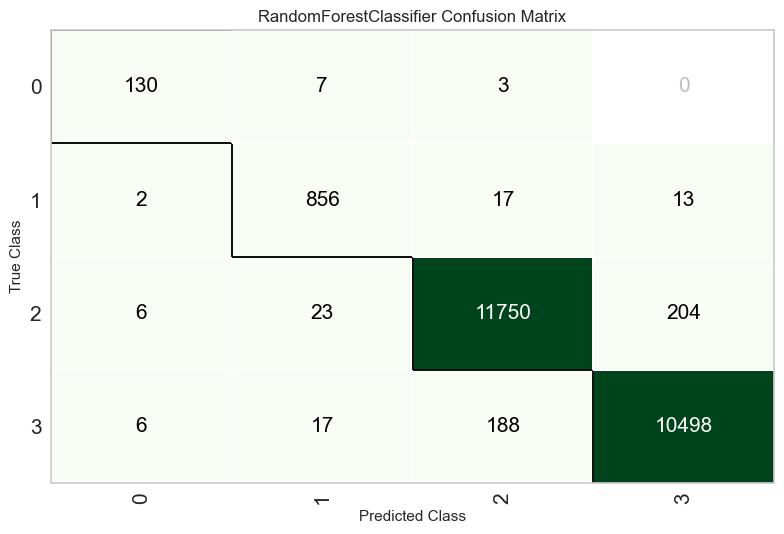

In [18]:
plot_model(rf, plot = 'confusion_matrix')

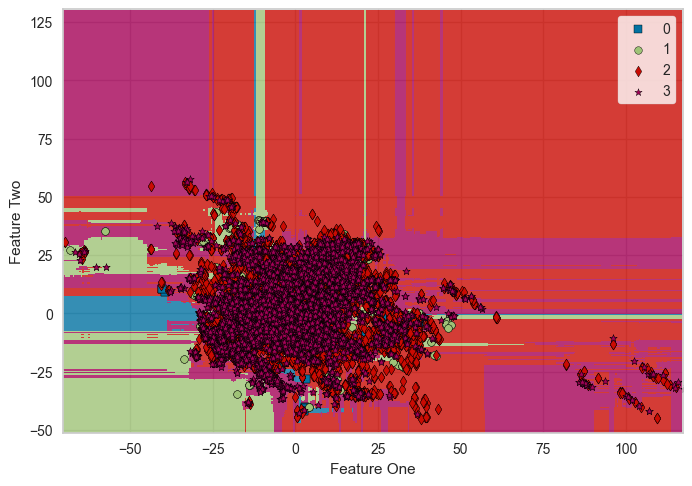

In [19]:
plot_model(rf, plot = 'boundary')

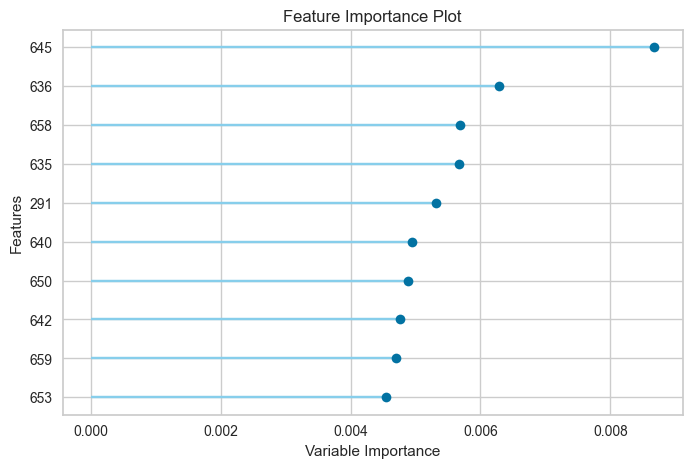

In [20]:
plot_model(rf, plot = 'feature')


In [22]:
save_model(rf, model_name=r'F:\RESTCN_CODE\best-model')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['0', '1', '2', '3', '4', '5', '6',
                                              '7', '8', '9', '10', '11', '12',
                                              '13', '14', '15', '16', '17', '18',
                                              '19', '20', '21', '22', '23', '24',
                                              '25', '26', '27', '28', '29', ...],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, c

In [23]:
test_x = []
test_y = []
for i,j,k in test:
    test_x.append(i[0])
    test_y.append(int(k))

In [24]:
df_test = pd.DataFrame(test_x)
df_test["target"] = pd.DataFrame(test_y)

In [25]:
pred_holdouts = predict_model(rf, data=df_test)
pred_holdouts.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.4998,0.5309,0.4998,0.4794,0.4710,0.0360,0.0387


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,target,prediction_label,prediction_score
0,-0.054417,0.041805,-0.997643,-0.153288,0.054274,-0.986690,-0.104,0.048,404.899994,409.000000,414.799988,418.700012,418.600006,414.600006,408.700012,404.700012,397.000000,402.000000,407.700012,413.600006,418.100006,420.700012,421.700012,418.200012,413.899994,409.000000,404.200012,399.899994,408.299988,410.100006,412.700012,414.600006,414.700012,412.899994,410.299988,408.399994,469.600006,472.700012,477.899994,482.100006,482.799988,479.700012,474.500000,469.799988,463.600006,467.399994,472.000000,477.200012,481.799988,485.100006,487.299988,484.100006,480.200012,475.700012,470.899994,466.500000,473.200012,475.200012,477.600006,479.100006,478.700012,476.799988,474.399994,472.899994,369.000000,364.700012,364.299988,368.000000,373.700012,378.399994,378.399994,374.700012,365.700012,365.500000,366.399994,368.000000,370.500000,373.399994,376.700012,378.000000,377.799988,376.500000,373.799988,370.200012,372.600006,374.299988,374.100006,372.100006,369.600006,367.899994,368.100006,370.000000,390.799988,386.399994,385.700012,389.000000,394.399994,398.799988,399.600006,396.500000,391.000000,389.299988,388.700012,389.399994,391.399994,393.799988,396.700012,398.000000,398.000000,397.299988,395.700012,393.700012,394.399994,395.899994,395.600006,393.500000,391.000000,389.500000,389.799988,391.899994,66.199997,69.300003,74.000000,77.400002,77.599998,74.599998,69.699997,66.300003,60.299999,64.000000,68.199997,72.800003,76.800003,79.400002,80.699997,77.500000,73.599998,69.500000,65.699997,62.400002,69.300003,70.900002,73.000000,74.400002,74.300003,72.800003,70.699997,69.199997,130.100006,133.100006,138.000000,141.899994,142.500000,139.500000,134.600006,130.399994,125.400002,128.300003,132.000000,136.600006,141.100006,144.899994,147.800003,144.000000,139.600006,135.199997,131.000000,127.500000,133.800003,135.600006,137.800003,139.199997,139.000000,137.199997,134.899994,133.500000,100.599998,97.099998,97.099998,100.400002,105.199997,109.099998,108.800003,105.400002,98.599998,97.800003,98.199997,99.500000,102.099998,105.099998,108.500000,109.000000,108.099998,10

In [26]:
qda = create_model('qda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7380,0.0000,0.7380,0.7566,0.7312,0.4974,0.5112
1,0.7234,0.0000,0.7234,0.7466,0.7144,0.4679,0.4861
2,0.7124,0.0000,0.7124,0.7353,0.7038,0.4474,0.4660
3,0.7425,0.0000,0.7425,0.7617,0.7355,0.5061,0.5206
4,0.7140,0.0000,0.7140,0.7349,0.7068,0.4613,0.4721
5,0.7261,0.0000,0.7261,0.7484,0.7180,0.4736,0.4908
6,0.7244,0.0000,0.7244,0.7456,0.7166,0.4706,0.4871
7,0.7159,0.0000,0.7159,0.7434,0.7061,0.4525,0.4745
8,0.7383,0.0000,0.7383,0.7512,0.7335,0.4998,0.5074


In [27]:
pred_holdouts = predict_model(qda, data=df_test)
pred_holdouts.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Quadratic Discriminant Analysis,0.4856,0,0.4856,0.4432,0.3883,-0.0093,-0.0148


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,target,prediction_label,prediction_score
0,-0.054417,0.041805,-0.997643,-0.153288,0.054274,-0.986690,-0.104,0.048,404.899994,409.000000,414.799988,418.700012,418.600006,414.600006,408.700012,404.700012,397.000000,402.000000,407.700012,413.600006,418.100006,420.700012,421.700012,418.200012,413.899994,409.000000,404.200012,399.899994,408.299988,410.100006,412.700012,414.600006,414.700012,412.899994,410.299988,408.399994,469.600006,472.700012,477.899994,482.100006,482.799988,479.700012,474.500000,469.799988,463.600006,467.399994,472.000000,477.200012,481.799988,485.100006,487.299988,484.100006,480.200012,475.700012,470.899994,466.500000,473.200012,475.200012,477.600006,479.100006,478.700012,476.799988,474.399994,472.899994,369.000000,364.700012,364.299988,368.000000,373.700012,378.399994,378.399994,374.700012,365.700012,365.500000,366.399994,368.000000,370.500000,373.399994,376.700012,378.000000,377.799988,376.500000,373.799988,370.200012,372.600006,374.299988,374.100006,372.100006,369.600006,367.899994,368.100006,370.000000,390.799988,386.399994,385.700012,389.000000,394.399994,398.799988,399.600006,396.500000,391.000000,389.299988,388.700012,389.399994,391.399994,393.799988,396.700012,398.000000,398.000000,397.299988,395.700012,393.700012,394.399994,395.899994,395.600006,393.500000,391.000000,389.500000,389.799988,391.899994,66.199997,69.300003,74.000000,77.400002,77.599998,74.599998,69.699997,66.300003,60.299999,64.000000,68.199997,72.800003,76.800003,79.400002,80.699997,77.500000,73.599998,69.500000,65.699997,62.400002,69.300003,70.900002,73.000000,74.400002,74.300003,72.800003,70.699997,69.199997,130.100006,133.100006,138.000000,141.899994,142.500000,139.500000,134.600006,130.399994,125.400002,128.300003,132.000000,136.600006,141.100006,144.899994,147.800003,144.000000,139.600006,135.199997,131.000000,127.500000,133.800003,135.600006,137.800003,139.199997,139.000000,137.199997,134.899994,133.500000,100.599998,97.099998,97.099998,100.400002,105.199997,109.099998,108.800003,105.400002,98.599998,97.800003,98.199997,99.500000,102.099998,105.099998,108.500000,109.000000,108.099998,10

In [28]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9115,0.9762,0.9115,0.9144,0.9121,0.8379,0.8384
1,0.9084,0.9750,0.9084,0.9116,0.9090,0.8326,0.8330
2,0.9162,0.9783,0.9162,0.9187,0.9167,0.8465,0.8469
3,0.9124,0.9747,0.9124,0.9137,0.9126,0.8389,0.8391
4,0.9174,0.9783,0.9174,0.9202,0.9180,0.8488,0.8492
5,0.9064,0.9731,0.9064,0.9085,0.9068,0.8283,0.8287
6,0.9205,0.9780,0.9205,0.9226,0.9209,0.8542,0.8544
7,0.9115,0.9743,0.9115,0.9141,0.9120,0.8378,0.8381
8,0.9185,0.9767,0.9185,0.9206,0.9189,0.8505,0.8507


In [29]:
pred_holdouts = predict_model(knn, data=df_test)
pred_holdouts.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.4206,0.5100,0.4206,0.4705,0.4403,0.0289,0.0295


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,target,prediction_label,prediction_score
0,-0.054417,0.041805,-0.997643,-0.153288,0.054274,-0.986690,-0.104,0.048,404.899994,409.000000,414.799988,418.700012,418.600006,414.600006,408.700012,404.700012,397.000000,402.000000,407.700012,413.600006,418.100006,420.700012,421.700012,418.200012,413.899994,409.000000,404.200012,399.899994,408.299988,410.100006,412.700012,414.600006,414.700012,412.899994,410.299988,408.399994,469.600006,472.700012,477.899994,482.100006,482.799988,479.700012,474.500000,469.799988,463.600006,467.399994,472.000000,477.200012,481.799988,485.100006,487.299988,484.100006,480.200012,475.700012,470.899994,466.500000,473.200012,475.200012,477.600006,479.100006,478.700012,476.799988,474.399994,472.899994,369.000000,364.700012,364.299988,368.000000,373.700012,378.399994,378.399994,374.700012,365.700012,365.500000,366.399994,368.000000,370.500000,373.399994,376.700012,378.000000,377.799988,376.500000,373.799988,370.200012,372.600006,374.299988,374.100006,372.100006,369.600006,367.899994,368.100006,370.000000,390.799988,386.399994,385.700012,389.000000,394.399994,398.799988,399.600006,396.500000,391.000000,389.299988,388.700012,389.399994,391.399994,393.799988,396.700012,398.000000,398.000000,397.299988,395.700012,393.700012,394.399994,395.899994,395.600006,393.500000,391.000000,389.500000,389.799988,391.899994,66.199997,69.300003,74.000000,77.400002,77.599998,74.599998,69.699997,66.300003,60.299999,64.000000,68.199997,72.800003,76.800003,79.400002,80.699997,77.500000,73.599998,69.500000,65.699997,62.400002,69.300003,70.900002,73.000000,74.400002,74.300003,72.800003,70.699997,69.199997,130.100006,133.100006,138.000000,141.899994,142.500000,139.500000,134.600006,130.399994,125.400002,128.300003,132.000000,136.600006,141.100006,144.899994,147.800003,144.000000,139.600006,135.199997,131.000000,127.500000,133.800003,135.600006,137.800003,139.199997,139.000000,137.199997,134.899994,133.500000,100.599998,97.099998,97.099998,100.400002,105.199997,109.099998,108.800003,105.400002,98.599998,97.800003,98.199997,99.500000,102.099998,105.099998,108.500000,109.000000,108.099998,10